In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [6]:
%matplotlib inline

In [ ]:
df = pd.read_csv("CVD_cleaned.csv")

In [ ]:
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (308854, 19)


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poo,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  int64  
 12  Weight_(kg)                   308854 non-nul

Check missing values

In [ ]:
print("\nMissing values in each column:\n", df.isnull().sum())


Missing values in each column:
 General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64


 Drop duplicates if any


In [11]:
df.drop_duplicates(inplace=True)

fill numeric columns with mean


In [12]:
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

For categorical columns, fill with mode

In [13]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

Convert categorical variables to category dtype

In [14]:
for col in categorical_cols:
    df[col] = df[col].astype('category')
df_encoded = pd.get_dummies(df, drop_first=True)

Summary statistics

In [15]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000
mean,170.615220,83.590399,28.626813,5.097557,29.834290,15.109517,6.297237
std,10.658452,21.344664,6.522810,8.200434,24.877812,14.926912,8.583837
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


Distribution plots

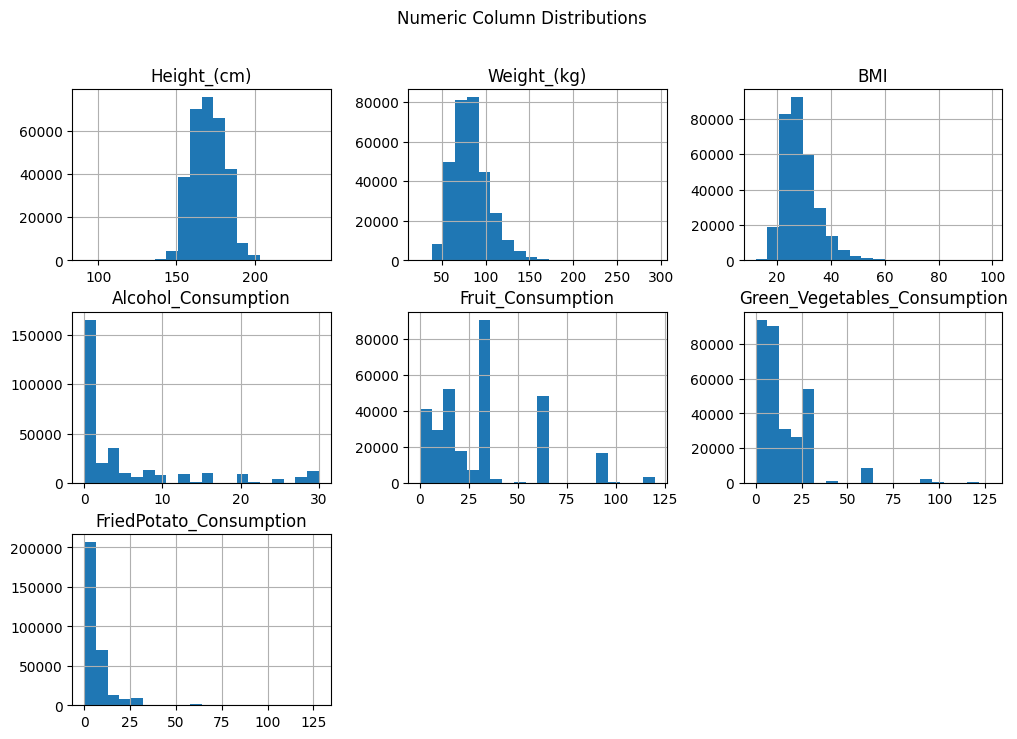

In [16]:
df[numeric_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle('Numeric Column Distributions')
plt.show()

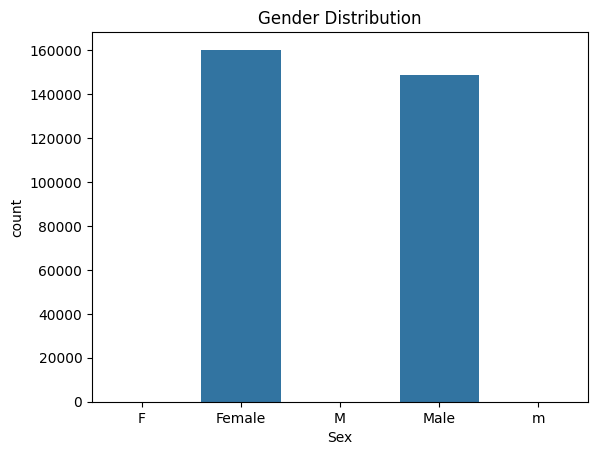

In [17]:
sns.countplot(data=df, x='Sex')
plt.title("Gender Distribution")
plt.show()

In [18]:
import pandas as pd
df = pd.read_csv("CVD_cleaned.csv")

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
print(df_encoded.columns.tolist())

['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'General_Health_Fair', 'General_Health_Good', 'General_Health_Poo', 'General_Health_Poor', 'General_Health_Very Good', 'General_Health_poo', 'Checkup_Never', 'Checkup_Within the past 2 years', 'Checkup_Within the past 5 years', 'Checkup_Within the past year', 'Exercise_Yes', 'Heart_Disease_Yes', 'Skin_Cancer_Yes', 'Other_Cancer_Yes', 'Depression_Yes', 'Diabetes_No, pre-diabetes or borderline diabetes', 'Diabetes_Yes', 'Diabetes_Yes, but female told only during pregnancy', 'Arthritis_Yes', 'Sex_Female', 'Sex_M', 'Sex_Male', 'Sex_m', 'Age_Category_25-29', 'Age_Category_30-34', 'Age_Category_35-39', 'Age_Category_40-44', 'Age_Category_45-49', 'Age_Category_50-54', 'Age_Category_55-59', 'Age_Category_60-64', 'Age_Category_65-69', 'Age_Category_70-74', 'Age_Category_75-79', 'Age_Category_80+', 'Smoking_History_Yes']


In [ ]:
X = df_encoded.drop("Heart_Disease_Yes", axis=1)
y = df_encoded["Heart_Disease_Yes"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:, 1]

print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_lr))

Logistic Regression:
              precision    recall  f1-score   support

       False       0.92      0.99      0.96     56777
        True       0.51      0.06      0.11      4994

    accuracy                           0.92     61771
   macro avg       0.71      0.53      0.54     61771
weighted avg       0.89      0.92      0.89     61771

AUC-ROC: 0.838074336719783


c:\Users\bajpa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

lr_pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=2000))
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=2000))])

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_bal = LogisticRegression(class_weight='balanced', max_iter=2000)
lr_bal.fit(X_train, y_train)

y_pred_bal = lr_bal.predict(X_test)
y_proba_bal = lr_bal.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_bal))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_bal))

c:\Users\bajpa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

       False       0.98      0.73      0.84     56777
        True       0.21      0.80      0.33      4994

    accuracy                           0.74     61771
   macro avg       0.59      0.77      0.58     61771
weighted avg       0.91      0.74      0.80     61771

AUC-ROC: 0.8392110972076615


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

lr_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(class_weight='balanced', max_iter=3000)
)

lr_pipeline.fit(X_train, y_train)

y_pred = lr_pipeline.predict(X_test)
y_proba = lr_pipeline.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

       False       0.98      0.73      0.84     56777
        True       0.21      0.80      0.33      4994

    accuracy                           0.74     61771
   macro avg       0.59      0.77      0.58     61771
weighted avg       0.91      0.74      0.80     61771

AUC-ROC: 0.8392252290363139


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize Random Forest with class weights to handle imbalance
rf_model = RandomForestClassifier(
    n_estimators=100, 
    class_weight='balanced', 
    random_state=42,
    n_jobs=-1
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_rf))

Random Forest Results:
              precision    recall  f1-score   support

       False       0.92      1.00      0.96     56777
        True       0.49      0.04      0.08      4994

    accuracy                           0.92     61771
   macro avg       0.70      0.52      0.52     61771
weighted avg       0.89      0.92      0.89     61771

AUC-ROC: 0.8113344217086782


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Step 1: Apply SMOTE on training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_resampled.value_counts())

# Step 2: Train Random Forest on balanced data
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_resampled, y_resampled)

# Step 3: Predict on original test data
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Step 4: Evaluate
print("Random Forest with SMOTE Results:")
print(classification_report(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_rf))

Before SMOTE: Heart_Disease_Yes
False    227106
True      19977
Name: count, dtype: int64
After SMOTE: Heart_Disease_Yes
False    227106
True     227106
Name: count, dtype: int64
Random Forest with SMOTE Results:
              precision    recall  f1-score   support

       False       0.95      0.89      0.92     56777
        True       0.27      0.48      0.35      4994

    accuracy                           0.85     61771
   macro avg       0.61      0.68      0.63     61771
weighted avg       0.90      0.85      0.87     61771

AUC-ROC: 0.8207447612655203


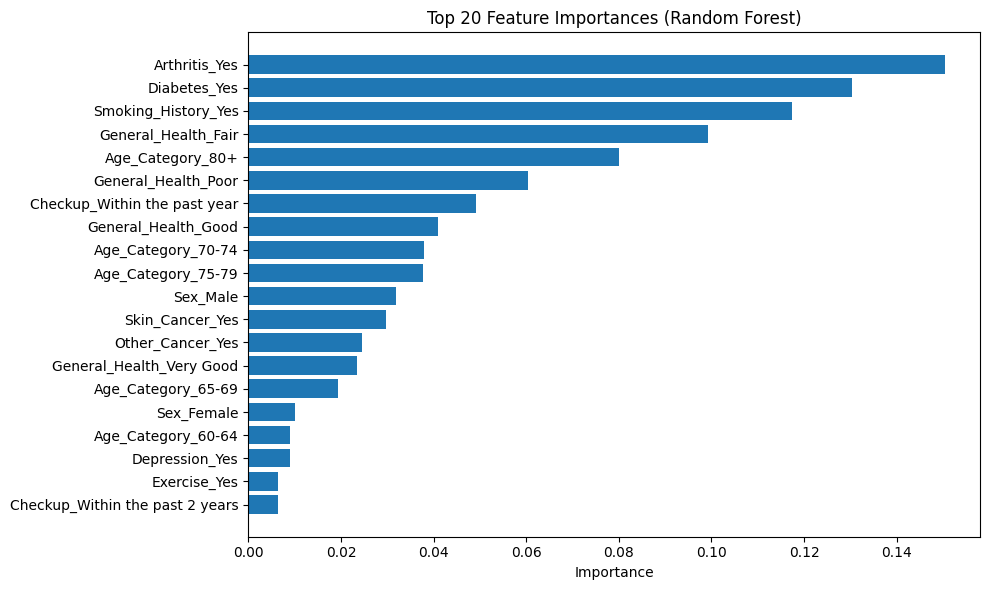

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Feature importance
importances = rf_model.feature_importances_
features = X_train.columns

feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(20)

# Plot
plt.figure(figsize=(10,6))
plt.barh(feat_df['Feature'], feat_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [4]:
# Re-import or redefine necessary parts (in case kernel was reset)
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load data again
df = pd.read_csv("CVD_cleaned.csv")
df = df.drop_duplicates()

# Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df_encoded.drop("Heart_Disease_Yes", axis=1)
y = df_encoded["Heart_Disease_Yes"]

# Train model again if needed
lr_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(class_weight='balanced', max_iter=3000)
)
lr_pipeline.fit(X, y)

# --- Prediction Example ---

# Sample input
sample = {
    'BMI': 25.0,
    'Smoking': 'Yes',
    'AlcoholDrinking': 'No',
    'Stroke': 'No',
    'PhysicalHealth': 5,
    'MentalHealth': 0,
    'DiffWalking': 'No',
    'Sex': 'Female',
    'AgeCategory': '55-59',
    'Race': 'White',
    'Diabetic': 'No',
    'PhysicalActivity': 'Yes',
    'GenHealth': 'Very good',
    'SleepTime': 4,
    'Asthma': 'Yes',
    'KidneyDisease': 'Yes',
    'SkinCancer': 'Yes'
}

# Convert to DataFrame
sample_df = pd.DataFrame([sample])

# One-hot encode and align with training data columns
sample_encoded = pd.get_dummies(sample_df)
sample_encoded = sample_encoded.reindex(columns=X.columns, fill_value=0)

# Make prediction
predicted_class = lr_pipeline.predict(sample_encoded)[0]
predicted_prob = lr_pipeline.predict_proba(sample_encoded)[0][1]

# Display result
print("🔍 Prediction:")
print("Heart Disease Risk:", "Yes" if predicted_class == 1 else "No")
print("Probability of having heart disease: {:.2f}%".format(predicted_prob * 100))

🔍 Prediction:
Heart Disease Risk: No
Probability of having heart disease: 2.32%
